In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./train.csv')
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
df.shape

(750000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [5]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [7]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  int64  
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 51.5 MB


<Axes: >

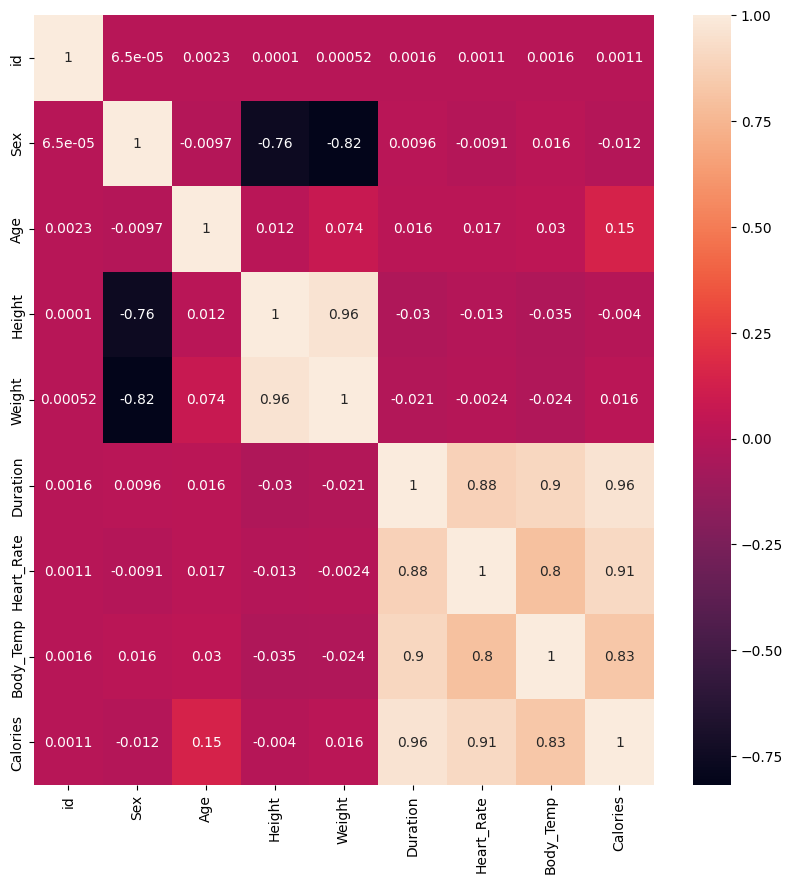

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

id            0.001148
Sex          -0.012011
Age           0.145683
Height       -0.004026
Weight        0.015863
Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Name: Calories, dtype: float64


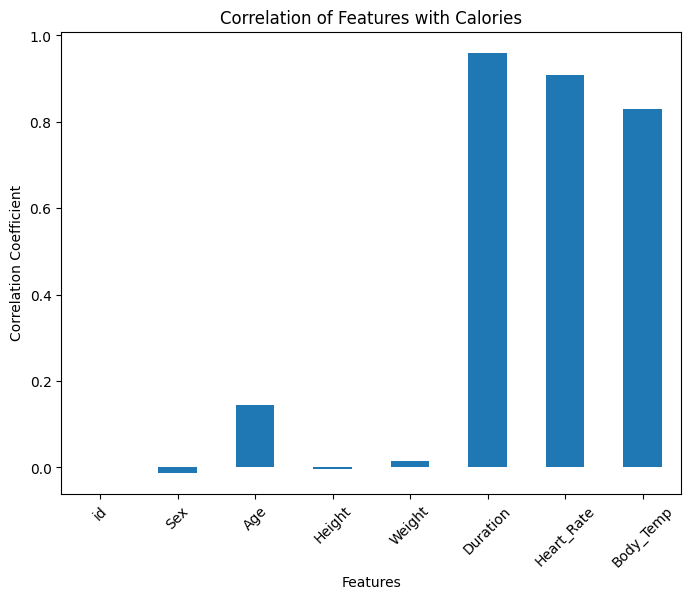

In [10]:
correlation_with_calories = df.corr()['Calories'].drop('Calories')

# Print the correlations
print(correlation_with_calories)

# Visualize the correlations (optional)
plt.figure(figsize=(8, 6))
correlation_with_calories.plot(kind='bar')
plt.title('Correlation of Features with Calories')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [97]:
# https://www.kaggle.com/competitions/playground-series-s5e5/overview/evaluation - here there is no square of the sum of residuals
from sklearn.metrics import mean_squared_log_error

def rmlse(y_true:np.ndarray, y_pred:np.ndarray):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [12]:
X = df.drop(['Calories','id'], axis=1)
y = df['Calories']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9684446417027912

In [14]:
from sklearn.metrics import mean_squared_log_error
y_pred = model.predict(X_test)
mean_squared_log_error(np.log1p(y_test), y_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain values less than or equal to -1.

In [15]:
# due to this above error we will take log(1+y) during training and avoid negatives
y_log = np.log1p(y_train)
model.fit(X_train, y_log)
model.score(X_test, np.log1p(y_test))

0.9653113210923763

In [96]:
rmlse(np.log1p(y_test), model.predict(X_test))

np.float64(0.04512331351169691)

In [17]:
import xgboost as xgb

In [18]:
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    reg_lambda=1,
    learning_rate=0.05,
    colsample_bytree=0.7,
    reg_alpha=0.1
)
xgb_model.fit(X_train, y_log)
xgb_model.score(X_test, np.log1p(y_test))

0.9961092398906211

In [19]:
rmlse(np.log1p(y_test), xgb_model.predict(X_test))

np.float64(0.012319965451654643)

In [20]:
xgb_model.feature_importances_

array([0.00876307, 0.01079286, 0.00057422, 0.00174701, 0.5457388 ,
       0.16105117, 0.27133286], dtype=float32)

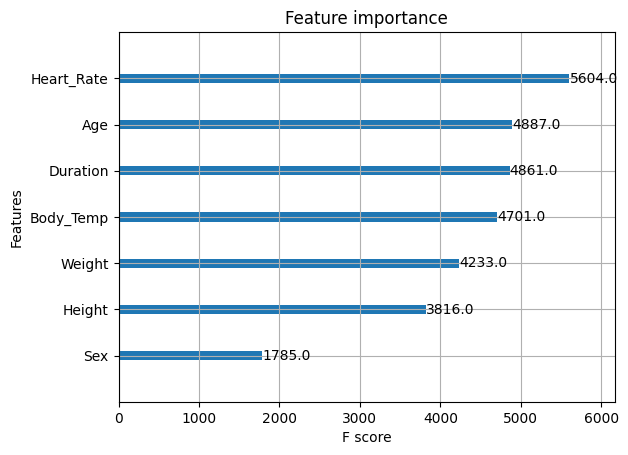

In [21]:
xgb.plot_importance(xgb_model); plt.show()

In [22]:
# from sklearn.model_selection import KFold,cross_val_score

# cv = KFold(n_splits=5)
# kfold = cross_val_score(LinearRegression(), X, np.log1p(y), cv=cv)
# print(kfold)
# print(kfold.mean())

In [23]:
X.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [24]:
coefficients = model.coef_  # linear regression
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients (optional)
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)
importance_df.head()

,Feature,Coefficient,Abs_Coefficient
6,Body_Temp,0.674625,0.674625
0,Sex,0.067627,0.067627
4,Duration,0.027082,0.027082
5,Heart_Rate,0.024485,0.024485
1,Age,0.005846,0.005846


In [25]:
from sklearn.linear_model import ElasticNetCV

# Perform cross-validation to find best alpha and l1_ratio
reg = ElasticNetCV(
    l1_ratio=[.1, .3, .5, .7, .9, .95, .99, 1],
    alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    cv=5,
    random_state=42
)

reg.fit(X_train, np.log1p(y_train))

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], cv=5,
             l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             random_state=42)

In [26]:
print("Best alpha:", reg.alpha_)
print("Best l1_ratio:", reg.l1_ratio_)

Best alpha: 0.0001
Best l1_ratio: 0.1


In [27]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': reg.coef_
})
print(coef_df[coef_df['Coefficient'] != 0])

      Feature  Coefficient
0         Sex     0.067425
1         Age     0.005847
2      Height    -0.001731
3      Weight     0.002548
4    Duration     0.027133
5  Heart_Rate     0.024486
6   Body_Temp     0.674006


In [28]:
r2_score = reg.score(X_test, np.log10(y_test))
print("R² Score:", r2_score)

R² Score: -29.751524352363194


In [29]:
y_pred = model.predict(X_test)
mean_squared_log_error(np.log1p(y_test), y_pred)

0.002036113422274889

In [30]:
y_pred = xgb_model.predict(X_test)
mean_squared_log_error(np.log1p(y_test), y_pred)

0.00030137369536465606

In [31]:
rmlse(np.log1p(y_test), reg.predict(X_test))

np.float64(0.044868904104810904)

In [32]:
xgb_model.feature_importances_

array([0.00876307, 0.01079286, 0.00057422, 0.00174701, 0.5457388 ,
       0.16105117, 0.27133286], dtype=float32)

In [33]:
fe = pd.DataFrame({'feature':X.columns, 'importance':xgb_model.feature_importances_})
fe.sort_values(by='importance', ascending=False)
fe.head(10)

,feature,importance
0,Sex,0.008763
1,Age,0.010793
2,Height,0.000574
3,Weight,0.001747
4,Duration,0.545739
5,Heart_Rate,0.161051
6,Body_Temp,0.271333


In [34]:
!pip install optuna
import optuna

In [35]:
xgb.get_config()

{'use_rmm': False, 'verbosity': 1}

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [105]:
def objective(trial):
  col_sample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
  reg_alpha = trial.suggest_float("reg_alpha",  0, 1)
  sub_sample = trial.suggest_float("sub_sample", 0.5, 1.0)
  learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
  max_depth = trial.suggest_int("max_depth",5, 10)
  reg_lambda = trial.suggest_float("reg_lambda", 0, 10,)
  n_estimators = trial.suggest_int("n_estimators", 50, 1000)

  model = xgb.XGBRegressor(
      n_estimators=n_estimators,
      reg_lambda=reg_lambda,
      colsample_bytree=col_sample_bytree,
      subsample=sub_sample,
      max_depth=max_depth,
      learning_rate=learning_rate,
      reg_alpha=reg_alpha,
      device='gpu',
      n_jobs=-1
  )

  rmsle_scorer = make_scorer(rmlse, greater_is_better=False)
  score = cross_val_score(model, X, y, cv=5, scoring=rmsle_scorer).mean()
  return score

In [106]:
study = optuna.create_study(direction='minimize',)

[I 2025-05-03 06:24:06,629] A new study created in memory with name: no-name-013364a7-bcb1-4b20-b1cd-4d5dfaf48cc5


In [107]:
study.optimize(objective, n_trials=50)

[I 2025-05-03 06:24:18,854] Trial 0 finished with value: -0.06564135668590843 and parameters: {'colsample_bytree': 0.9607541741008876, 'reg_alpha': 0.32102177855546565, 'sub_sample': 0.5374282819450147, 'learning_rate': 0.03266484781025154, 'max_depth': 6, 'reg_lambda': 6.1245869855528365, 'n_estimators': 471}. Best is trial 0 with value: -0.06564135668590843.
[I 2025-05-03 06:24:41,877] Trial 1 finished with value: -0.061262154236882096 and parameters: {'colsample_bytree': 0.7267284809025703, 'reg_alpha': 0.5473531517437304, 'sub_sample': 0.9216098969785333, 'learning_rate': 0.13870880879345554, 'max_depth': 10, 'reg_lambda': 0.8591175398451623, 'n_estimators': 362}. Best is trial 0 with value: -0.06564135668590843.
[I 2025-05-03 06:24:57,720] Trial 2 finished with value: -0.06257575348271618 and parameters: {'colsample_bytree': 0.8259651894725994, 'reg_alpha': 0.566796748983794, 'sub_sample': 0.560544886813918, 'learning_rate': 0.05560258233896734, 'max_depth': 6, 'reg_lambda': 1.645

In [108]:
study.best_params

{'colsample_bytree': 0.947944608976429,
 'reg_alpha': 0.37857301742374727,
 'sub_sample': 0.7794790760761376,
 'learning_rate': 0.013221924092743252,
 'max_depth': 8,
 'reg_lambda': 0.6681779581672964,
 'n_estimators': 93}

In [109]:
optuna.visualization.plot_optimization_history(study)

In [110]:
optuna.visualization.plot_parallel_coordinate(study)

In [111]:
optuna.visualization.plot_slice(study)

In [112]:
optuna.visualization.plot_param_importances(study)

In [113]:
best_n_estimators = study.best_params['n_estimators']
best_reg_lambda = study.best_params['reg_lambda']
best_col_sample_bytree = study.best_params['colsample_bytree']
best_max_depth = study.best_params['max_depth']
best_learning_rate = study.best_params['learning_rate']
best_reg_alpha = study.best_params['reg_alpha']
best_sub_sample = study.best_params['sub_sample']

In [114]:
fine_tune_model = xgb.XGBRegressor(
    n_estimators=best_n_estimators,
    reg_lambda=best_reg_lambda,
    col_sample_bytree=best_col_sample_bytree,
    max_depth=best_max_depth,
    learning_rate=best_learning_rate,
    reg_alpha=best_reg_alpha,
    gamma=best_gamma,
    tree_method='gpu_hist',
    n_jobs=-1
)

In [115]:
fine_tune_model.fit(X_train, np.log1p(y_train))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:34:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:34:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "col_sample_bytree" } are not used.




XGBRegressor(base_score=None, booster=None, callbacks=None,
             col_sample_bytree=0.947944608976429, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=2.2384698824902613e-05,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.013221924092743252,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=93, n_jobs=-1,
             num_parallel_tree=None, ...)

In [116]:
fine_tune_model.score(X_test, np.log1p(y_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:34:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




0.9092871859293842

In [117]:
rmlse(np.log1p(y_test), fine_tune_model.predict(X_test))

np.float64(0.07465719456948945)

# Predicting on test.csv

In [118]:
test_data = pd.read_csv('./test.csv')
test_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [119]:
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})

In [120]:
X.describe()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,0.500961,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253
std,0.499999,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [121]:
test_data.describe()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,0.501124,41.452464,174.725624,75.147712,15.415428,95.479084,40.036093
std,72168.927986,0.500000,15.177769,12.822039,13.979513,8.349133,9.450161,0.778448
min,750000.000000,0.000000,20.000000,127.000000,39.000000,1.000000,67.000000,37.100000
25%,812499.750000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,874999.500000,1.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,937499.250000,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,999999.000000,1.000000,79.000000,219.000000,126.000000,30.000000,128.000000,41.500000


In [122]:
id = test_data['id']
test_data = test_data.drop(['id'], axis=1)

In [123]:
submision = fine_tune_model.predict(test_data)

In [124]:
sub_df = pd.DataFrame({'id':id, 'Calories':submision})
sub_df.head()

,id,Calories
0,750000,3.610143
1,750001,4.518199
2,750002,4.399766
3,750003,4.660270
4,750004,4.288199


In [125]:
# prompt: [sub_df['Calories'] < 0].count()
# i want count

print(sum(sub_df['Calories'] < 0))

0


In [126]:
# pd.DataFrame({'id':id, 'Calories':submision}).to_csv('submission.csv', index=False)